Importamos todas las librerias necesarias y despues todos los datasets que vamos a usar. 

In [3]:
pip install contextily


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install geopandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import plotly.express as px

In [8]:
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20916\2489760224.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')


In [9]:
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')
df_ambitos = pd.read_csv('2023_Generales/Ambitos_Generales_2023.csv')
df_colores = pd.read_csv('2023_Generales/Colores_2023.csv')

In [10]:
df_resultados.head().T

,0,1,2,3,4
año,2023,2023,2023,2023,2023
eleccion_tipo,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL
recuento_tipo,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO
padron_tipo,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
distrito_id,1,1,1,1,1
distrito_nombre,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
seccionprovincial_id,0,0,0,0,0
seccionprovincial_nombre,NaN,NaN,NaN,NaN,NaN
seccion_id,1,1,1,1,1
seccion_nombre,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01


In [11]:
df_caba.head()

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06


In [12]:
df_ambitos.head()

,año,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre
0,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01
1,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,2,Comuna 02
2,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,3,Comuna 03
3,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,4,Comuna 04
4,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05


In [13]:
df_colores.head()

,año,distrito_id,agrupacion_nombre,agrupacion_id,agrupacion_color
0,2023,1,Ciudad Autónoma de Buenos Aires,13,#E7635F
1,2023,2,Buenos Aires,13,#E7635F
2,2023,3,Catamarca,13,#E7635F
3,2023,4,Córdoba,13,#E7635F
4,2023,5,Corrientes,13,#E7635F


In [14]:
df_resultados_caba = df_resultados[df_resultados['distrito_id'] == 1]
df_resultados_caba.head()

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


In [15]:
df_resultados_caba.shape    

(515822, 23)

In [66]:
df_resultados_caba['votos_cantidad'].sum()

13646850

In [17]:
df_caba['TOTAL'].sum()

2497035.0

In [18]:
for columna in df_resultados_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_resultados_caba[columna].unique())
    print("\n")  

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna eleccion_tipo:
['GENERAL']


Opciones únicas en la columna recuento_tipo:
['PROVISORIO']


Opciones únicas en la columna padron_tipo:
['NORMAL']


Opciones únicas en la columna distrito_id:
[1]


Opciones únicas en la columna distrito_nombre:


['Ciudad Autónoma de Buenos Aires']


Opciones únicas en la columna seccionprovincial_id:
[0]


Opciones únicas en la columna seccionprovincial_nombre:
[nan]


Opciones únicas en la columna seccion_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Opciones únicas en la columna seccion_nombre:
['Comuna 01' 'Comuna 02' 'Comuna 03' 'Comuna 04' 'Comuna 05' 'Comuna 06'
 'Comuna 07' 'Comuna 08' 'Comuna 09' 'Comuna 10' 'Comuna 11' 'Comuna 12'
 'Comuna 13' 'Comuna 14' 'Comuna 15']


Opciones únicas en la columna circuito_id:
['00018' '00019' '00001' '00002' '00003' '00004' '00005' '00006' '00007'
 '00008' '00009' '00010' '00020' '00021' '00022' '00023' '00024' '00011'
 '00012' '00013' '00014' '00015' '00016' '00017' '00031' '00032' '00033'
 '00034' '00035' '00025' '00026' '00027' '00028' '00029' '00030' '00036'
 '00037' '00038' '00039' '00040' '00041' '00042' '00043' '00044' '00045'
 '00046' '00047' '00048' '00049' '00050' '00051' '00052' '00053' '00054'
 '00055' '00056' '00057' '00058' '00

In [19]:
for columna in df_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_caba[columna].unique())
    print("\n") 

Opciones únicas en la columna WKT:
['MULTIPOLYGON (((-58.3661871461469 -34.6204312876783,-58.3660639106602 -34.621515418103,-58.3658425950003 -34.6237048832166,-58.3658342563784 -34.623835253489,-58.3657919798787 -34.6239884106249,-58.3654779550486 -34.6239704890445,-58.3640983812104 -34.6247099910476,-58.3635108880291 -34.6249876716871,-58.3634535130463 -34.6251237728734,-58.3664821002131 -34.6251912978642,-58.3679784789629 -34.62519842047,-58.3679550369998 -34.6271427044301,-58.3680980198034 -34.6271931268357,-58.368251981578 -34.6273183042386,-58.3686156102674 -34.6276353327267,-58.3694356610091 -34.6283186865831,-58.3706574008251 -34.6294995959563,-58.3709626379646 -34.6266508132812,-58.3713063658055 -34.6266628839813,-58.3725521459197 -34.6267466708693,-58.3745640705045 -34.6268014291647,-58.3755730893349 -34.6273052700513,-58.3762237604151 -34.6262869670616,-58.3767496130235 -34.6251220540446,-58.3770806317425 -34.6234886898763,-58.3772237938455 -34.6220465198698,-58.377231539720

In [20]:
for columna in df_colores.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_colores[columna].unique())
    print("\n")  

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna distrito_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  0]


Opciones únicas en la columna agrupacion_nombre:
['Ciudad Autónoma de Buenos Aires' 'Buenos Aires' 'Catamarca' 'Córdoba'
 'Corrientes' 'Chaco' 'Chubut' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero' 'Tucumán'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' 'ARGENTINA']


Opciones únicas en la columna agrupacion_id:
[  13  131  132  133  134  135  136  137  151  153  167  177  180  181
  184  186  188  191  193  194  198   20  201  208  210 2103  211  212
  215  216  218  220  221  223  229   23  231  238  239  258  262  268
  276  297  298  304  309  311  317  318  319  321  323  324  328  329
  333  343  345  347  350  351   36   40    5  501  502  503  504  505
  506  554   57  642   65

In [21]:
for columna in df_ambitos.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_ambitos[columna].unique())
    print("\n") 

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna distrito_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires' 'Buenos Aires' 'Catamarca' 'Córdoba'
 'Corrientes' 'Chaco' 'Chubut' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero' 'Tucumán'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']


Opciones únicas en la columna seccionprovincial_id:
[0 1 2 3 4 5 6 7 8]


Opciones únicas en la columna seccionprovincial_nombre:
[nan 'Sección Primera' 'Sección Segunda' 'Sección Tercera'
 'Sección Cuarta' 'Sección Quinta' 'Sección Sexta' 'Sección Séptima'
 'Sección Capital' 'Capital' 'Este' 'Oeste']


Opciones únicas en la columna seccion_id:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  35  45
  51  52  53  71  75  7

In [22]:
df_resultados_caba.columns.tolist()

['año',
 'eleccion_tipo',
 'recuento_tipo',
 'padron_tipo',
 'distrito_id',
 'distrito_nombre',
 'seccionprovincial_id',
 'seccionprovincial_nombre',
 'seccion_id',
 'seccion_nombre',
 'circuito_id',
 'circuito_nombre',
 'mesa_id',
 'mesa_tipo',
 'mesa_electores',
 'cargo_id',
 'cargo_nombre',
 'agrupacion_id',
 'agrupacion_nombre',
 'lista_numero',
 'lista_nombre',
 'votos_tipo',
 'votos_cantidad']

In [23]:
df_caba.columns.tolist()

['WKT',
 'ID',
 'CIRCUITO_N',
 'COMUNA',
 'BARRIO',
 'TOTAL',
 'MASCULINO',
 'FEMENINO',
 'PERIMETRO',
 'AREA']

In [24]:
df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int)

df_caba['COMUNA'] = df_caba['COMUNA'].astype(int)

df_combinado = pd.merge(df_resultados_caba, df_caba, left_on='seccion_id', right_on='COMUNA', how='left')

df_combinado.head().T

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20916\3219336168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int)


,0,1,2,3,4
año,2023,2023,2023,2023,2023
eleccion_tipo,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL
recuento_tipo,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO
padron_tipo,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
distrito_id,1,1,1,1,1
distrito_nombre,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
seccionprovincial_id,0,0,0,0,0
seccionprovincial_nombre,NaN,NaN,NaN,NaN,NaN
seccion_id,1,1,1,1,1
seccion_nombre,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01


In [25]:
df_combinado.shape

(5850404, 33)

In [26]:
for columna in df_combinado.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_combinado[columna].unique())
    print("\n") 

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna eleccion_tipo:
['GENERAL']


Opciones únicas en la columna recuento_tipo:
['PROVISORIO']


Opciones únicas en la columna padron_tipo:
['NORMAL']


Opciones únicas en la columna distrito_id:
[1]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires']


Opciones únicas en la columna seccionprovincial_id:
[0]


Opciones únicas en la columna seccionprovincial_nombre:
[nan]


Opciones únicas en la columna seccion_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Opciones únicas en la columna seccion_nombre:
['Comuna 01' 'Comuna 02' 'Comuna 03' 'Comuna 04' 'Comuna 05' 'Comuna 06'
 'Comuna 07' 'Comuna 08' 'Comuna 09' 'Comuna 10' 'Comuna 11' 'Comuna 12'
 'Comuna 13' 'Comuna 14' 'Comuna 15']


Opciones únicas en la columna circuito_id:
['00018' '00019' '00001' '00002' '00003' '00004' '00005' '00006' '00007'
 '00008' '00009' '00010' '00020' '00021' '00022' '00023' '00024' '00011'
 '00012' '0

In [27]:
df_combinado['circuito_id'] = df_combinado['circuito_id'].astype(int)

valores_unicos_circuito_id = df_combinado['circuito_id'].unique()
print(valores_unicos_circuito_id)

[ 18  19   1   2   3   4   5   6   7   8   9  10  20  21  22  23  24  11
  12  13  14  15  16  17  31  32  33  34  35  25  26  27  28  29  30  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167]


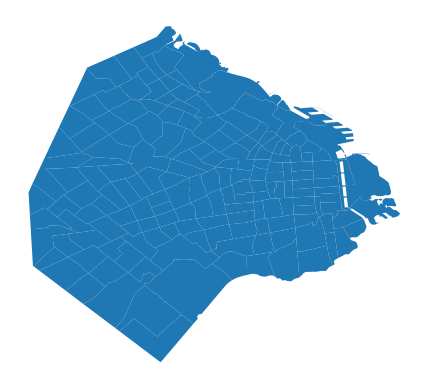

In [28]:
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
ax = gdf.plot()
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

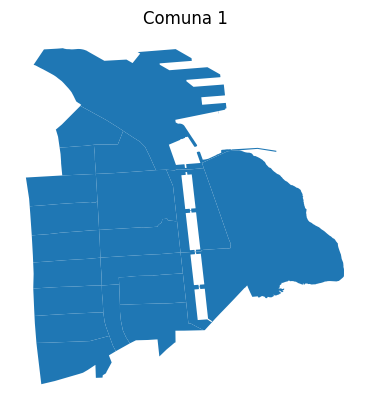

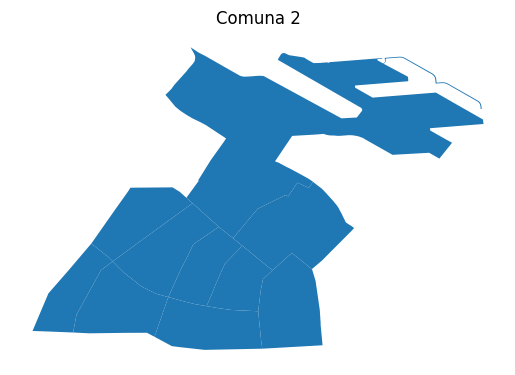

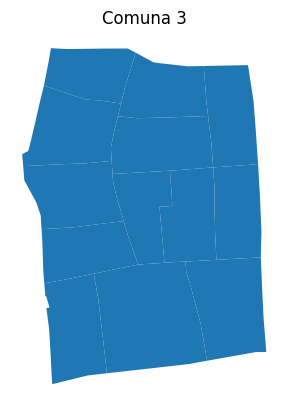

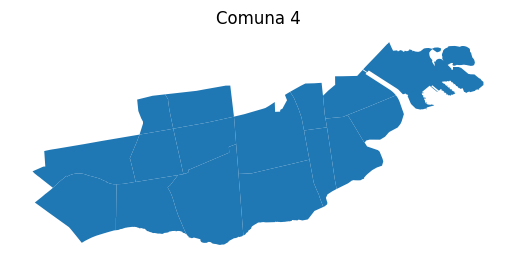

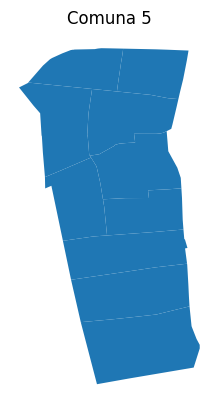

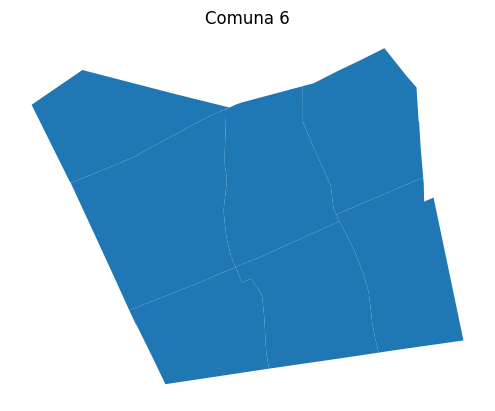

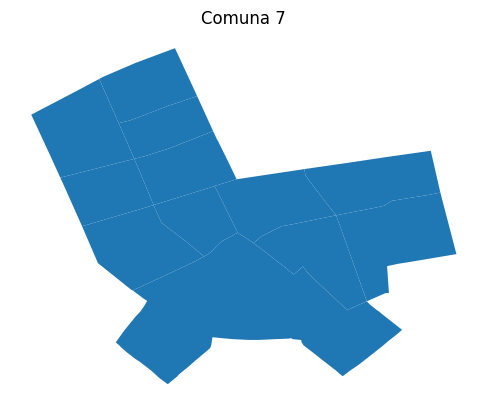

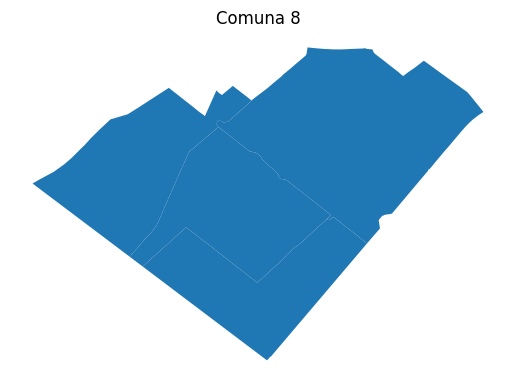

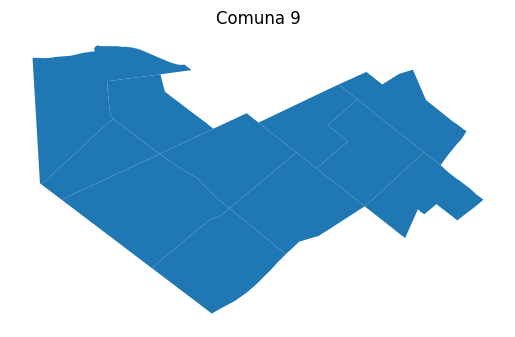

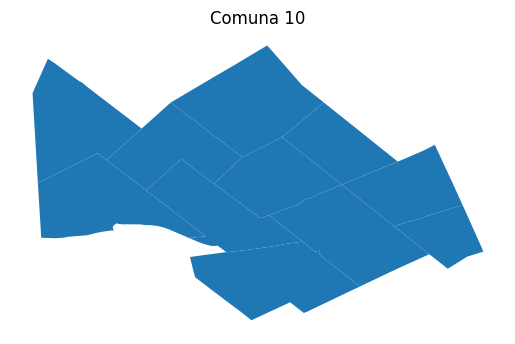

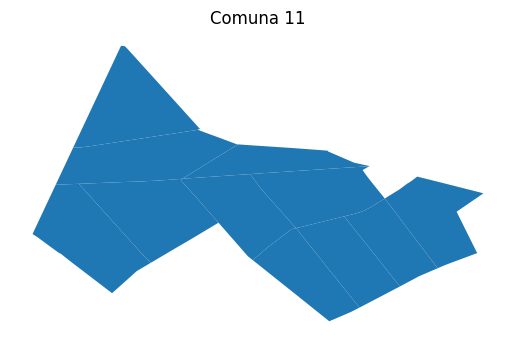

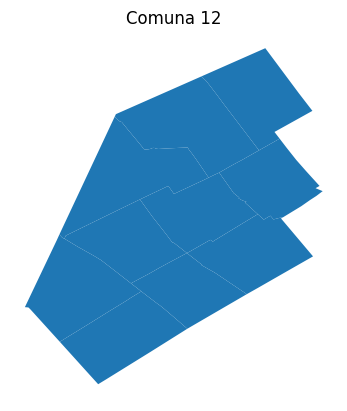

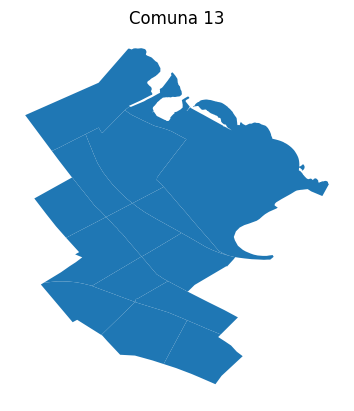

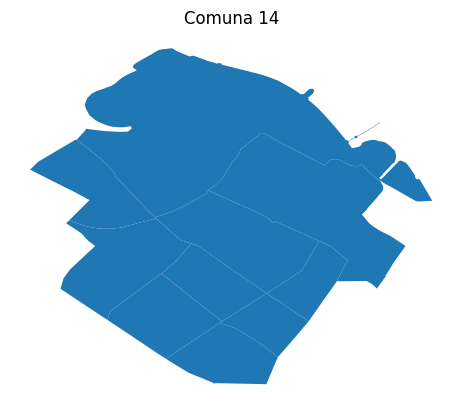

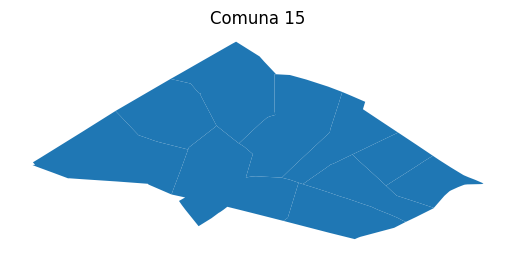

In [29]:
for comuna in gdf['COMUNA'].unique():
    ax = gdf[gdf['COMUNA'] == comuna].plot()
    ax.set_title(f"Comuna {comuna}")
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

In [30]:
print(df_combinado.columns)

Index(['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre',
       'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre',
       'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre',
       'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre',
       'votos_tipo', 'votos_cantidad', 'WKT', 'ID', 'CIRCUITO_N', 'COMUNA',
       'BARRIO', 'TOTAL', 'MASCULINO', 'FEMENINO', 'PERIMETRO', 'AREA'],
      dtype='object')


In [31]:
df_muestra = df_combinado.sample(frac=0.01, random_state=1)
gdf_muestra = gpd.GeoDataFrame(df_muestra, geometry=gpd.GeoSeries.from_wkt(df_muestra['WKT']))

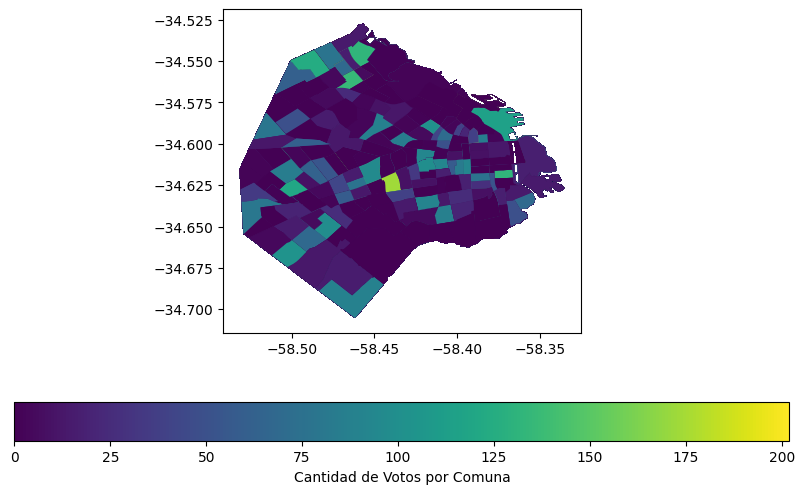

In [32]:
gdf_muestra['votos_cantidad'] = pd.to_numeric(gdf_muestra['votos_cantidad'], errors='coerce')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_muestra.plot(column='votos_cantidad', ax=ax, legend=True,
                legend_kwds={'label': "Cantidad de Votos por Comuna",
                            'orientation': "horizontal"})
plt.show()

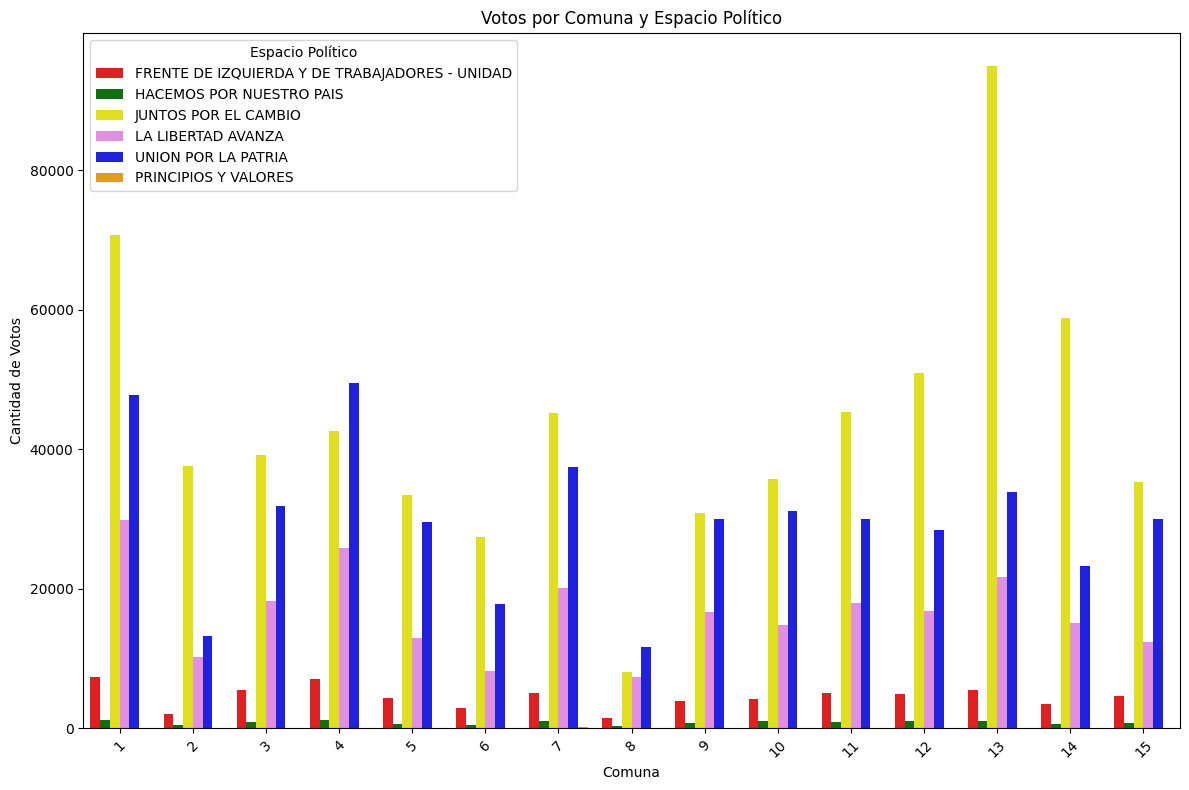

In [40]:
votos_por_comuna_y_politica = gdf_muestra.groupby(['COMUNA', 'agrupacion_nombre'])['votos_cantidad'].sum().reset_index()

paleta = {
    'UNION POR LA PATRIA': 'blue',
    'JUNTOS POR EL CAMBIO': 'yellow',
    'LA LIBERTAD AVANZA': 'violet',
    'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': 'red',
    'HACEMOS POR NUESTRO PAIS': 'green',
    'PRINCIPIOS Y VALORES': 'orange',
    np.nan: 'grey' 
}


plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x='COMUNA', 
    y='votos_cantidad', 
    hue='agrupacion_nombre', 
    data=votos_por_comuna_y_politica, 
    palette=paleta
)
plt.title('Votos por Comuna y Espacio Político')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Votos')
plt.legend(title='Espacio Político')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [46]:
pd.set_option('display.max_rows', None)
votos_ordenados_por_comuna = votos_por_comuna_y_politica.sort_values(by=['COMUNA', 'votos_cantidad'], ascending=[True, False])

print(votos_ordenados_por_comuna)

    COMUNA                               agrupacion_nombre  votos_cantidad
2        1                            JUNTOS POR EL CAMBIO           70727
4        1                             UNION POR LA PATRIA           47823
3        1                              LA LIBERTAD AVANZA           29883
0        1  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD            7352
1        1                        HACEMOS POR NUESTRO PAIS            1130
7        2                            JUNTOS POR EL CAMBIO           37631
9        2                             UNION POR LA PATRIA           13208
8        2                              LA LIBERTAD AVANZA           10214
5        2  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD            2033
6        2                        HACEMOS POR NUESTRO PAIS             398
12       3                            JUNTOS POR EL CAMBIO           39139
14       3                             UNION POR LA PATRIA           31880
13       3               

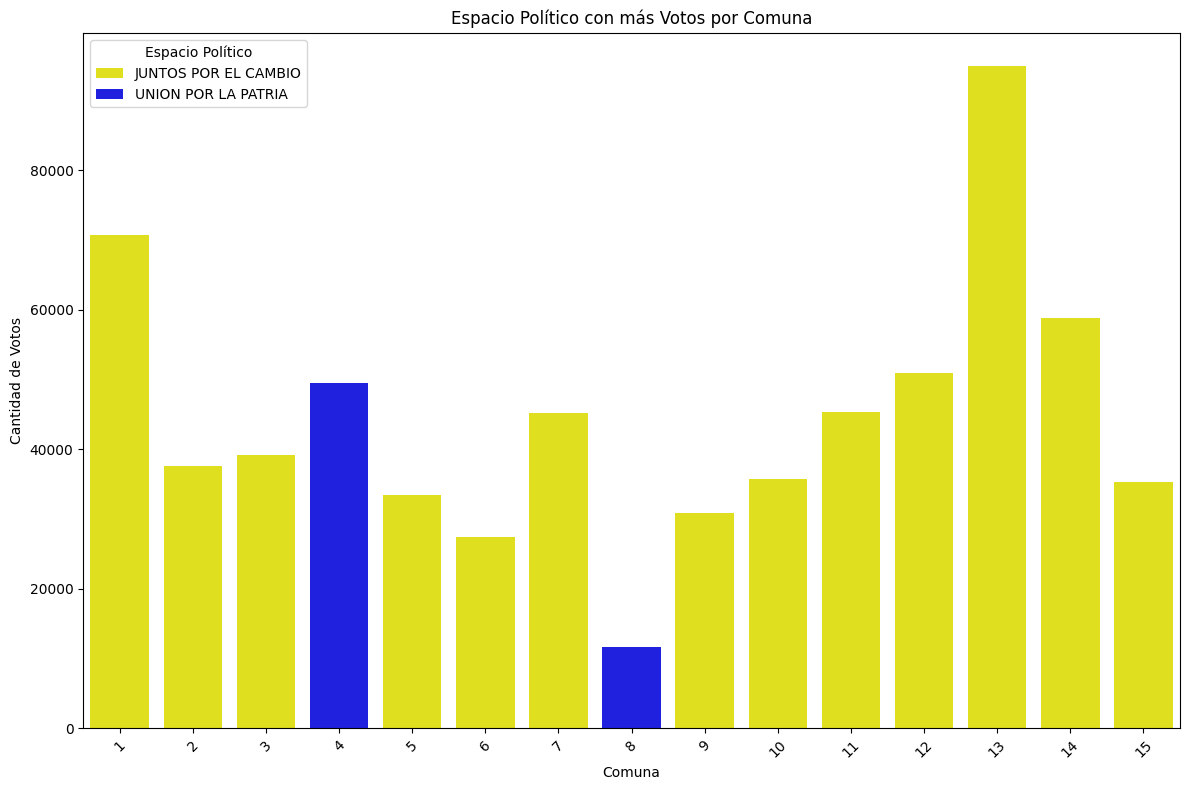

In [47]:
votos_maximos_barplot = votos_por_comuna.sort_values('votos_cantidad', ascending=False).drop_duplicates('COMUNA')

plt.figure(figsize=(12, 8))
sns.barplot(
    x='COMUNA', 
    y='votos_cantidad', 
    hue='agrupacion_nombre', 
    data=votos_maximos_barplot, 
    palette=paleta
)
plt.title('Espacio Político con más Votos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Votos')
plt.legend(title='Espacio Político')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

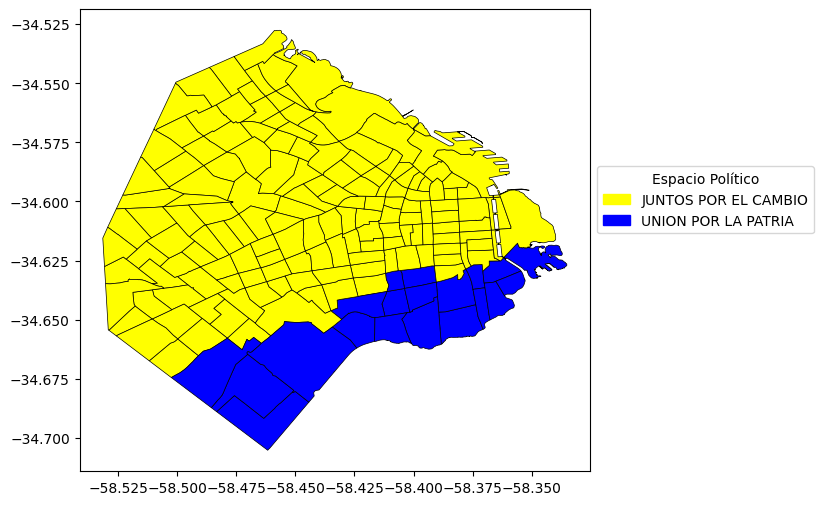

In [61]:
colores_politicos = {
    "JUNTOS POR EL CAMBIO": "yellow",  
    "UNION POR LA PATRIA": "blue",     
    
}

votos_por_comuna = gdf_muestra.groupby(['COMUNA', 'agrupacion_nombre'])['votos_cantidad'].sum().reset_index()
votos_maximos_por_comuna = votos_por_comuna.sort_values('votos_cantidad', ascending=False).drop_duplicates('COMUNA')
gdf_votos_maximos = gdf_muestra[['COMUNA', 'geometry']].drop_duplicates().merge(votos_maximos_por_comuna, on='COMUNA')


gdf_votos_maximos['color'] = gdf_votos_maximos['agrupacion_nombre'].map(colores_politicos)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_votos_maximos.plot(ax=ax, color=gdf_votos_maximos['color'], edgecolor='black', linewidth=0.5)

legend_elements = [mpatches.Patch(color=color, label=party) for party, color in colores_politicos.items()]
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0.5), title='Espacio Político')

plt.show()

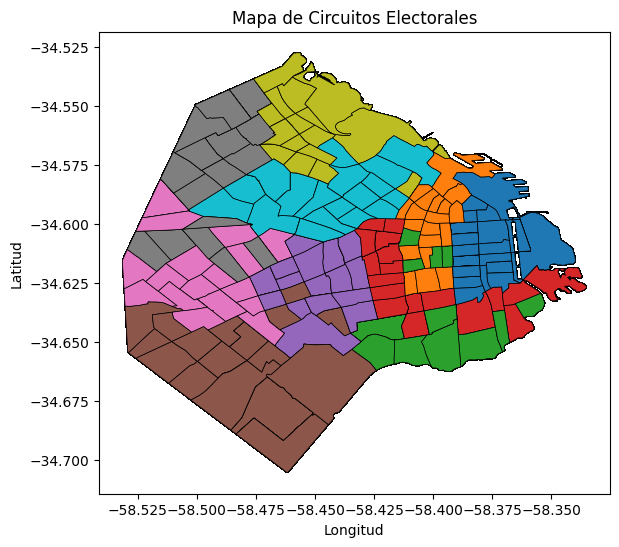

In [68]:
gdf_muestra['circuito_id'] = gdf_muestra['circuito_id'].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_muestra.plot(ax=ax, column='circuito_id', categorical=True, legend=False, 
                edgecolor='black', linewidth=0.5)


plt.title('Mapa de Circuitos Electorales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

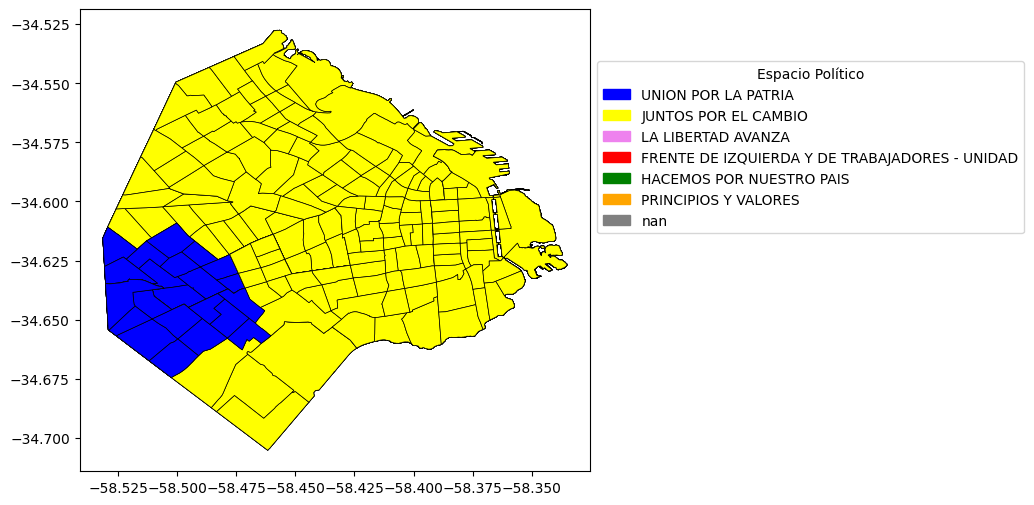

In [69]:
paleta = {
    'UNION POR LA PATRIA': 'blue',
    'JUNTOS POR EL CAMBIO': 'yellow',
    'LA LIBERTAD AVANZA': 'violet',
    'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': 'red',
    'HACEMOS POR NUESTRO PAIS': 'green',
    'PRINCIPIOS Y VALORES': 'orange',
    np.nan: 'grey'
}

# Agrupar por circuito y espacio político, y sumar los votos
votos_por_circuito = gdf_muestra.groupby(['circuito_id', 'agrupacion_nombre'])['votos_cantidad'].sum().reset_index()

# Encontrar la fuerza política con más votos en cada circuito
votos_maximos_por_circuito = votos_por_circuito.sort_values('votos_cantidad', ascending=False).drop_duplicates('circuito_id')

# Preparar los datos geográficos
# Asegurarse de que 'circuito_id' está en el formato correcto
gdf_muestra['circuito_id'] = gdf_muestra['circuito_id'].astype(int)

# Unir los datos de votos con los datos geográficos
gdf_votos_maximos_circuito = gdf_muestra[['circuito_id', 'geometry']].drop_duplicates().merge(votos_maximos_por_circuito, on='circuito_id')

# Asignar colores a cada circuito en función del espacio político con más votos
gdf_votos_maximos_circuito['color'] = gdf_votos_maximos_circuito['agrupacion_nombre'].map(paleta)

# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_votos_maximos_circuito.plot(ax=ax, color=gdf_votos_maximos_circuito['color'], edgecolor='black', linewidth=0.5)

# Crear una leyenda personalizada
legend_elements = [mpatches.Patch(color=color, label=party) for party, color in paleta.items()]
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0.5), title='Espacio Político')

plt.show()